### 基于内容的推荐-酒店推荐

西雅图酒店数据集：
-  下 载 地 址 ： https://github.com/susanli2016/Machine-
Learning-with-Python/blob/master/Seattle_Hotels.csv

- Step1，对酒店描述（Desc）进行特征提取
    - N-Gram，提取N个连续字的集合，作为特征
    - TF-IDF，按照(min_df, max_df)提取关键词，并生成TFIDF矩阵
- Step2，计算酒店之间的相似度矩阵
    - 余弦相似度
- Step3，对于指定的酒店，选择相似度最大的Top-K个酒店进行输出

**CountVectorizer**

将文本中的词语转换为词频矩阵
- fit_transform：计算各个词语出现的次数
- get_feature_names：可获得所有文本的关键词
- toarray()：查看词频矩阵的结果。

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
df = pd.read_csv('Seattle_Hotels.csv', encoding="GBK")

In [12]:
df.head()

,id,name,address,desc
0,1,Hilton Garden Seattle Downtown,"1821 Boren Avenue, Seattle Washington 98101 USA","Located on the southern tip of Lake Union, the..."
1,2,Sheraton Grand Seattle,"1400 6th Avenue, Seattle, Washington 98101 USA","Located in the city's vibrant core, the Sherat..."
2,3,Crowne Plaza Seattle Downtown,"1113 6th Ave, Seattle, WA 98101","Located in the heart of downtown Seattle, the ..."
3,4,Kimpton Hotel Monaco Seattle,"1101 4th Ave, Seattle, WA98101",What?s near our hotel downtown Seattle locatio...
4,5,The Westin Seattle,"1900 5th Avenue,燬eattle,燱ashington?8101燯SA",Situated amid incredible shopping and iconic a...


**什么是N-Gram（N元语法）：**

- 基于一个假设：第n个词出现与前n-1个词相关，而与其他任何词不相关.
- N=1时为unigram，N=2为bigram，N=3为trigram
- N-Gram指的是给定一段文本，其中的N个item的序列
<br>比如文本：A B C D E，对应的Bi-Gram为A B, B C, C D, D E
- 当一阶特征不够用时，可以用N-Gram做为新的特征。比如在处理文本特征时，一个关键词是一个特征，但有些情况不够用，需要提取更多的特征，采用N-Gram => 可以理解是相邻两个关键词的特征组合

In [13]:
plt.rcParams['font.sans-serif'] = ['SimHei']
# 得到酒店描述和中n-gram特征中的Top-K个
def get_top_n_words(corpus, n=1,k=None):
    # 统计ngram词频矩阵
    vec = CountVectorizer(ngram_range=(n,n),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    # 按词频从大到小排序
    words_freq = sorted(words_freq, key=lambda x:x[1], reverse=True)
    return words_freq[:k]

**CountVectorizer**

将文本中的词语转换为词频矩阵
- fit_transform：计算各个词语出现的次数
- get_feature_names：可获得所有文本的关键词
- toarray()：查看词频矩阵的结果。

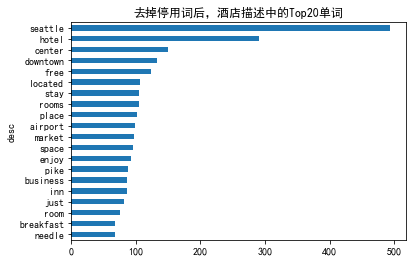

In [14]:
common_words = get_top_n_words(df['desc'], 1, 20)
df1 = pd.DataFrame(common_words, columns=['desc', 'count'])
df1.groupby('desc').sum()['count'].sort_values().plot(kind='barh', title='去掉停用词后，酒店描述中的Top20单词')
plt.show()

In [16]:
df1.head()

,desc,count
0,seattle,494
1,hotel,291
2,center,150
3,downtown,132
4,free,123


**TF-IDF**
- TF：Term Frequency，词频<br>
一个单词的重要性和它在文档中出现的次数呈正比。<br>
$TF=\frac{单词次数}{文档中总单词数}$
- IDF：Inverse Document Frequency，逆向文档频率<br>
一个单词在文档中的区分度。这个单词出现的文档数越少，区分度越大，IDF越大<br>
$TF=log\frac{文档总数}{单词出现的文档数+1}$

In [17]:
def clean_text(text):
    # 转成小写
    text = text.lower()
    return text
df['desc_clean'] = df['desc'].apply(clean_text)
# 使用TF-IDF提取文本特征
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), min_df=0,stop_words='english')
tfidf_matrix = tf.fit_transform(df['desc_clean'])

#### TfidfVectorizer:
- 将文档集合转化为tf-idf特征值的矩阵

**构造函数：**

- analyzer：word或者char，即定义特征为词（word）或n-gram字符
- ngram_range: 参数为二元组(min_n, max_n)，即要提取的n-gram的下限和上限范围
- max_df：最大词频，数值为小数[0.0, 1.0],或者是整数，默认为1.0
- min_df：最小词频，数值为小数[0.0, 1.0],或者是整数，默认为1.0
- stop_words：停用词，数据类型为列表

**功能函数：**

- fit_transform：进行tf-idf训练，学习到一个字典，并返回Document-term的矩阵，也就是词典中的词在该文档中出现的频次

In [18]:
tf.get_feature_names()

['00',
 '00 night',
 '00 night plus',
 '000',
 '000 crystals',
 '000 crystals marble',
 '000 sq',
 '000 sq ft',
 '000 square',
 '000 square feet',
 '000 square foot',
 '0best',
 '0best georgetown',
 '0best georgetown inn',
 '10',
 '10 000',
 '10 000 sq',
 '10 best',
 '10 best hotels',
 '10 km',
 '10 km nites',
 '10 km seattle',
 '10 minute',
 '10 minute drive',
 '10 minute walk',
 '10 minutes',
 '10 minutes space',
 '10 night',
 '10 night red',
 '10 redesigned',
 '10 redesigned venues',
 '10 unique',
 '10 unique guestrooms',
 '100',
 '100 meters',
 '100 meters away',
 '100 non',
 '100 non smoking',
 '100 smoke',
 '100 smoke free',
 '100 walkscore',
 '100 walkscore com',
 '100 year',
 '100 year old',
 '1000',
 '1000 avenue',
 '1000 avenue madison',
 '1000 seattle',
 '1000 seattle ideally',
 '103',
 '103 000',
 '103 000 square',
 '109',
 '109 room',
 '109 room inn',
 '109 rooms',
 '109 rooms meet',
 '11',
 '11 km',
 '11 km emerald',
 '11 km seattle',
 '11 miles',
 '11 miles downtown',
 '

In [19]:
print(len(tf.get_feature_names()))

27097


In [21]:
df3 = pd.DataFrame(tfidf_matrix)

In [22]:
df3.head()

,0
0,"(0, 22183)\t0.0613164650920911\n (0, 25419)..."
1,"(0, 4463)\t0.061331633637637314\n (0, 26595..."
2,"(0, 7518)\t0.06688650876591641\n (0, 8191)\..."
3,"(0, 14769)\t0.06352502742031854\n (0, 20935..."
4,"(0, 2863)\t0.05598648123409399\n (0, 16018)..."


In [23]:
df3.to_csv('df3.csv', index=False)

In [24]:
print(tfidf_matrix)

  (0, 22183)	0.0613164650920911
  (0, 25419)	0.0613164650920911
  (0, 23277)	0.0613164650920911
  (0, 17391)	0.0613164650920911
  (0, 17595)	0.0613164650920911
  (0, 11872)	0.0613164650920911
  (0, 304)	0.0613164650920911
  (0, 19522)	0.0613164650920911
  (0, 6645)	0.0613164650920911
  (0, 14465)	0.0613164650920911
  (0, 3296)	0.05335337352292991
  (0, 6025)	0.0613164650920911
  (0, 1348)	0.0613164650920911
  (0, 7614)	0.0613164650920911
  (0, 2369)	0.0613164650920911
  (0, 25203)	0.0613164650920911
  (0, 18467)	0.0613164650920911
  (0, 23114)	0.0613164650920911
  (0, 19271)	0.0613164650920911
  (0, 16149)	0.0613164650920911
  (0, 16767)	0.0613164650920911
  (0, 23708)	0.0613164650920911
  (0, 20179)	0.056658355134323025
  (0, 10431)	0.048695263565161837
  (0, 13608)	0.0613164650920911
  :	:
  (151, 2164)	0.02162856275275701
  (151, 4900)	0.04122562089128017
  (151, 25917)	0.03533031056552012
  (151, 5289)	0.045169196942200875
  (151, 10107)	0.09033839388440175
  (151, 2849)	0.04604073

In [25]:
# 计算酒店之间的余弦相似度（线性核函数）
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_similarities)

[[1.         0.01410687 0.03409536 ... 0.01546273 0.00243768 0.00701259]
 [0.01410687 1.         0.02222502 ... 0.0160442  0.00441637 0.00887939]
 [0.03409536 0.02222502 1.         ... 0.02337574 0.00828872 0.0111682 ]
 ...
 [0.01546273 0.0160442  0.02337574 ... 1.         0.0121928  0.00845911]
 [0.00243768 0.00441637 0.00828872 ... 0.0121928  1.         0.00322107]
 [0.00701259 0.00887939 0.0111682  ... 0.00845911 0.00322107 1.        ]]


In [26]:
cosine_similarities.shape

(152, 152)

In [27]:
df2 = pd.DataFrame(cosine_similarities)

In [28]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
0,1.000000,0.014107,0.034095,0.010144,0.032584,0.014133,0.020657,0.014899,0.007194,0.020063,...,0.026999,0.017006,0.003245,0.002530,0.024020,0.007555,0.006412,0.015463,0.002438,0.007013
1,0.014107,1.000000,0.022225,0.015966,0.030915,0.015839,0.034408,0.015861,0.006023,0.013326,...,0.008367,0.009759,0.006845,0.000000,0.016520,0.010244,0.020211,0.016044,0.004416,0.008879
2,0.034095,0.022225,1.000000,0.010307,0.021360,0.019811,0.015365,0.014842,0.016366,0.011062,...,0.009997,0.010691,0.003251,0.000000,0.029202,0.007626,0.014817,0.023376,0.008289,0.011168
3,0.010144,0.015966,0.010307,1.000000,0.038459,0.042591,0.038589,0.030925,0.013322,0.029403,...,0.040451,0.003744,0.018614,0.002621,0.022016,0.016221,0.013675,0.010294,0.007561,0.005715
4,0.032584,0.030915,0.021360,0.038459,1.000000,0.030552,0.034711,0.032719,0.017261,0.021958,...,0.014780,0.007824,0.011826,0.004183,0.018587,0.013482,0.012504,0.016078,0.024204,0.005885


In [29]:
tfidf_matrix.shape

(152, 27097)

In [31]:
df.set_index('name', inplace=True)

In [33]:
indices = pd.Series(df.index)

In [34]:
def recommendations(name, cosine_similarity = cosine_similarities):
    recommended_hotels = []
    # 找到想要查询酒店名称的idx
    idx = indices[indices == name].index[0]
    print('idx=', idx)
    # 对于idx酒店的余弦相似度向量按照从大到小进行排序
    score_series = pd.Series(cosine_similarity[idx]).sort_values(ascending=False)
    # 取相似度最大的前10个
    top_10_indexes = list(score_series.iloc[1:11].index)
    # 放到推荐列表中
    for i in top_10_indexes:
        recommended_hotels.append(list(df.index)[i])
    
    return recommended_hotels
print(recommendations('Hilton Seattle Airport & Conference Center'))
print(recommendations('The Bacon Mansion Bed and Breakfast'))

idx= 49
['DoubleTree by Hilton Hotel Seattle Airport', 'Embassy Suites by Hilton Seattle Tacoma International Airport', 'Four Points by Sheraton Seattle Airport South', 'Seattle Airport Marriott', 'Homewood Suites by Hilton Seattle-Tacoma Airport/Tukwila', 'Hampton Inn Seattle-Airport', 'Best Western Seattle Airport Hotel', 'Knights Inn Tukwila', 'Econo Lodge SeaTac Airport North', 'Motel 6 Seattle Sea-Tac Airport South']
idx= 116
['11th Avenue Inn Bed and Breakfast', 'Shafer Baillie Mansion Bed & Breakfast', 'Chittenden House Bed and Breakfast', 'Gaslight Inn', 'Bed and Breakfast Inn Seattle', 'Silver Cloud Hotel - Seattle Broadway', 'Hyatt House Seattle', 'Mozart Guest House', 'Holiday Inn Seattle Downtown', 'Best Western Plus Pioneer Square Hotel Downtown']


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['second third document.','second second document']
# 定义一个类的实例
vectorizer = TfidfVectorizer()
# 计算各个词语出现的次数
X = vectorizer.fit_transform(corpus)
# toarray()：查看词频矩阵的结果。
print(X.toarray())
# get_feature_names():可获得所有文本的关键词
print(vectorizer.get_feature_names())

[[0.50154891 0.50154891 0.70490949]
 [0.4472136  0.89442719 0.        ]]
['document', 'second', 'third']


In [40]:
test = ['a first second document.','thid ac dc.']
print(vectorizer.transform(test).toarray())
print(vectorizer.inverse_transform(vectorizer.transform(test)))

[[0.70710678 0.70710678 0.        ]
 [0.         0.         0.        ]]
[array(['second', 'document'], dtype='<U8'), array([], dtype='<U8')]


In [41]:
# Fit步骤学习idf vector，一个全局的词权重_idf_diag。输入的X是一个稀疏矩阵，行是样本数，列是特征数。
# X : array, [n_samples, n_features]   Document-term matrix.
#Transform步骤是把X这个计数矩阵转换成tf-idf表示， X = X * self._idf_diag，然后进行归一化

# TfidfVectorizer从训练数据集中学习到词典vocab=['document', 'second', 'third']包含三个词，
# 并且学习到_idf的全局idf vector
#来了新的测试样本，会生成document-term矩阵，矩阵中的数是该文档中该词出现的次数，即tf;然后tf*idf（从idf vector中查找），
# 最后归一化。因此第二个测试样本都为0